In [1]:
import numpy as np
import pandas as pd
import vector
import os
import hist
import awkward as ak

vector.register_awkward()

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# mplhep for CMS-style plots
import mplhep as hep

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 16})

In [3]:
def make_vector(events: pd.DataFrame, obj: str):
    """Create a ``vector`` object from the columns of the dataframe"""
    mstring = "Msd" if obj == "ak8FatJet" else "Mass"

    return vector.array(
        {
            "pt": events[f"{obj}Pt"],
            "phi": events[f"{obj}Phi"],
            "eta": events[f"{obj}Eta"],
            "M": events[f"{obj}{mstring}"],
        }
    )

In [4]:
events = pd.read_parquet(
    "/eos/uscms/store/user/cmantill/bbbb/matching/Oct2/2018/GluGlutoHHto4B_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/parquet"
)
jets = make_vector(events, "ak4Jet")
gen_higgs = make_vector(events, "GenHiggs")
fjs = make_vector(events, "ak8FatJet")

In [5]:
list(events.keys())

[('GenHiggsEta', 0),
 ('GenHiggsEta', 1),
 ('GenHiggsPhi', 0),
 ('GenHiggsPhi', 1),
 ('GenHiggsMass', 0),
 ('GenHiggsMass', 1),
 ('GenHiggsPt', 0),
 ('GenHiggsPt', 1),
 ('GenbEta', 0),
 ('GenbEta', 1),
 ('GenbEta', 2),
 ('GenbEta', 3),
 ('GenbPhi', 0),
 ('GenbPhi', 1),
 ('GenbPhi', 2),
 ('GenbPhi', 3),
 ('GenbMass', 0),
 ('GenbMass', 1),
 ('GenbMass', 2),
 ('GenbMass', 3),
 ('GenbPt', 0),
 ('GenbPt', 1),
 ('GenbPt', 2),
 ('GenbPt', 3),
 ('ak4JetHiggsMatch', 0),
 ('ak4JetHiggsMatch', 1),
 ('ak4JetHiggsMatch', 2),
 ('ak4JetHiggsMatch', 3),
 ('ak4JetHiggsMatch', 4),
 ('ak4JetHiggsMatch', 5),
 ('ak4JetHiggsMatchIndex', 0),
 ('ak4JetHiggsMatchIndex', 1),
 ('ak4JetHiggsMatchIndex', 2),
 ('ak4JetHiggsMatchIndex', 3),
 ('ak4JetHiggsMatchIndex', 4),
 ('ak4JetHiggsMatchIndex', 5),
 ('ak4JethadronFlavour', 0),
 ('ak4JethadronFlavour', 1),
 ('ak4JethadronFlavour', 2),
 ('ak4JethadronFlavour', 3),
 ('ak4JethadronFlavour', 4),
 ('ak4JethadronFlavour', 5),
 ('ak8FatJetHiggsMatch', 0),
 ('ak8FatJetHig

In [6]:
drbh1ak8 = events["ak8FatJetMaxdRH1"].to_numpy()
drbh2ak8 = events["ak8FatJetMaxdRH2"].to_numpy()
indexak8 = events["ak8FatJetHiggsMatchIndex"].to_numpy()
indexak4 = events["ak4JetHiggsMatchIndex"].to_numpy()
nbh1ak8 = events["ak8FatJetNumBMatchedH1"].to_numpy()
nbh2ak8 = events["ak8FatJetNumBMatchedH2"].to_numpy()

In [7]:
drbh2ak8

array([[-9.99990000e+04, -9.99990000e+04, -9.99990000e+04],
       [ 3.13859177e+00, -9.99990000e+04, -9.99990000e+04],
       [-9.99990000e+04, -9.99990000e+04, -9.99990000e+04],
       ...,
       [ 2.98892260e+00, -9.99990000e+04, -9.99990000e+04],
       [ 2.86160755e+00, -9.99990000e+04, -9.99990000e+04],
       [ 1.93889380e+00,  3.09812212e+00, -9.99990000e+04]])

In [8]:
drbh2ak8[indexak8 == 1]

array([0.96044981, 2.43918419, 1.15334857, ..., 0.83738023, 1.58113182,
       1.9388938 ])

In [9]:
hist_dr_h1 = hist.Hist(hist.axis.Regular(40, 0, 4, name="drb", label="max dr with b-quark"))
hist_dr_h1.fill(drb=drbh1ak8[indexak8 == 0])
hist_dr_h1

Hist(Regular(40, 0, 4, name='drb', label='max dr with b-quark'), storage=Double()) # Sum: 257855.0 (258450.0 with flow)

In [10]:
indexak8

array([[-99999, -99999, -99999],
       [     0, -99999, -99999],
       [-99999, -99999, -99999],
       ...,
       [     0, -99999, -99999],
       [     0, -99999, -99999],
       [     1,      0, -99999]])

In [11]:
hist_dr_h2 = hist.Hist(hist.axis.Regular(40, 0, 4, name="drb", label="max dr with b-quark"))
hist_dr_h2.fill(drb=drbh2ak8[indexak8 == 1])
hist_dr_h2

Hist(Regular(40, 0, 4, name='drb', label='max dr with b-quark'), storage=Double()) # Sum: 257688.0 (258260.0 with flow)

Text(1, 0, 'Max dR(fatjet, b-quark)')

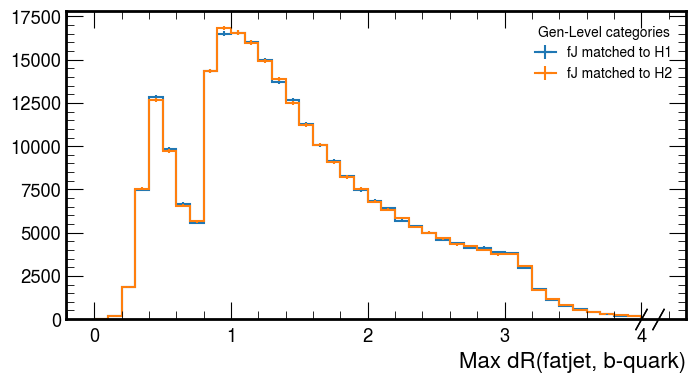

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
hep.histplot(hist_dr_h1, ax=ax, label="fJ matched to H1")
hep.histplot(hist_dr_h2, ax=ax, label="fJ matched to H2")
leg = ax.legend(fontsize=10)
leg.set_title("Gen-Level categories", prop={"size": 10})
ax.set_xlabel(r"Max dR(fatjet, b-quark)")

In [13]:
# ak4 jets matched to h1 and h2
h1ak4 = indexak4 == 0
h2ak4 = indexak4 == 1
num_ak4m2h1 = h1ak4.sum(axis=1)
num_ak4m2h2 = h2ak4.sum(axis=1)
h1m2ak4 = num_ak4m2h1 == 2
h2m2ak4 = num_ak4m2h2 == 2

# ak8 jets matched to h1 and h2
h1ak8 = indexak8 == 0
h2ak8 = indexak8 == 1
num_ak8m2h1 = h1ak8.sum(axis=1)
num_ak8m2h2 = h2ak8.sum(axis=1)
h1m1ak8 = num_ak8m2h1 == 1
h2m1ak8 = num_ak8m2h2 == 1

boosted = h1m1ak8 & h2m1ak8
resolved = (h1m2ak4 & h2m2ak4) & ~(boosted) & (num_ak8m2h1==0) & (num_ak8m2h2==0)
semi_resolved_h1 = h1m2ak4 & (h2m1ak8 & ~h2m2ak4) & ~(resolved) & ~(boosted)
semi_resolved_h2 = h2m2ak4 & (h1m1ak8 & ~h1m2ak4) & ~(resolved) & ~(boosted)
semi_resolved = semi_resolved_h1 | semi_resolved_h2
not_categorized = ~(resolved | boosted | semi_resolved)

In [14]:
h1ak8nb2 = (indexak8 == 0) & (nbh1ak8 == 2)
h2ak8nb2 = (indexak8 == 1) & (nbh2ak8 == 2)
h1m1ak8b2 = h1ak8nb2.sum(axis=1) == 1
h2m1ak8b2 = h2ak8nb2.sum(axis=1) == 1

h1ak8nb1 = (indexak8 == 0) & (nbh1ak8 == 1)
h2ak8nb1 = (indexak8 == 1) & (nbh2ak8 == 1)
h1m1ak8b1 = h1ak8nb1.sum(axis=1) == 1
h2m1ak8b1 = h2ak8nb1.sum(axis=1) == 1

boosted_nb2 = h1m1ak8b2 & h2m1ak8b2
boosted_nb1 = h1m1ak8b1 & h2m1ak8b1
boosted_nb1nb2 = (h1m1ak8b1 & h2m1ak8b2) | (h1m1ak8b2 & h2m1ak8b1)

In [15]:
semi_resolved_h1_b2 = h1m2ak4 & (h2m1ak8b2 & ~h2m2ak4) & ~(resolved) & ~(boosted)
semi_resolved_h2_b2 = h2m2ak4 & (h1m1ak8b2 & ~h1m2ak4) & ~(resolved) & ~(boosted)
semi_resolved_h1_b1 = h1m2ak4 & (h2m1ak8b1 & ~h2m2ak4) & ~(resolved) & ~(boosted)
semi_resolved_h2_b1 = h2m2ak4 & (h1m1ak8b1 & ~h1m2ak4) & ~(resolved) & ~(boosted)

semi_resolved_h_b2 = semi_resolved_h1_b2 | semi_resolved_h2_b2
semi_resolved_h_b1 = semi_resolved_h1_b1 | semi_resolved_h2_b1

## Classification from gen-level definition

We can classify events depending on matching into orthogonal categories:
- Boosted: 2 AK8 jets matched to H1 and H2, respectively
- Resolved: 4 AK4 jets matched to H1 and H2, 2 and 2, respectively - AND vetoing boosted
- Semi-resolved: "2 AK4 jets matched to H1/H2 and 1 AK8 jet matched to H2/H1 - AND vetoing boosted or resolved

In [16]:
print(f"Total number of signal events: {len(events)}")
print(f"2 AK8 jets matched to H1 and H2: {ak.sum(boosted)}")
print(f"4 AK4 jets matched to H1 and H2: {ak.sum(resolved)}")
print(f"2 AK4 jets matched to H1/H2 and 1 AK8 jet matched to H2/H1: {ak.sum(semi_resolved)}")
print(f"Outside of these categories: {ak.sum(not_categorized)}")
print(
    f"Sum of all: {ak.sum(not_categorized) + ak.sum(resolved) + ak.sum(boosted) + ak.sum(semi_resolved)}"
)

Total number of signal events: 1000000
2 AK8 jets matched to H1 and H2: 143785
4 AK4 jets matched to H1 and H2: 295841
2 AK4 jets matched to H1/H2 and 1 AK8 jet matched to H2/H1: 72341
Outside of these categories: 488033
Sum of all: 1000000


## Tasks for billy (gen-level)

Understand behavior at gen-level of `not-categorized events` (events that are not boosted, resolved or semi-resolved):
- plot gen MHH for all events (95248 events) and for each of the 4 categories above

Text(1, 0, '$m_{HH}$')

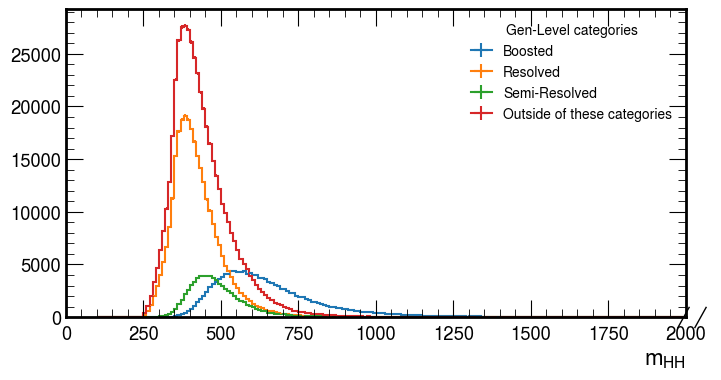

In [17]:
# calcualte m_HH for every event
mhh = (gen_higgs[:, 0] + gen_higgs[:, 1]).m

# bypass into each category
mhh_boosted = mhh[boosted]
mhh_resolved = mhh[resolved]
mhh_semi = mhh[semi_resolved]
mhh_out = mhh[not_categorized]

# start to plot, code modified on Christina's plot_h1h2_fj
bins = np.arange(mhh.min(), mhh.max(), 10)
bins = np.arange(100, 2000, 10)
var_axis = hist.axis.Variable(bins, name="var", label="variable")
cat_axis = hist.axis.StrCategory([], name="cat", growth=True)

hist_mhh = hist.Hist(var_axis, cat_axis)
hist_mhh.fill(var=mhh_boosted, cat="boosted")
hist_mhh.fill(var=mhh_semi, cat="semi_resolved")
hist_mhh.fill(var=mhh_resolved, cat="resolved")
hist_mhh.fill(var=mhh_out, cat="non-categorized")

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
hist_mhh[{"cat": "boosted"}].plot1d(ax=ax, label="Boosted")
hist_mhh[{"cat": "resolved"}].plot1d(ax=ax, label="Resolved")
hist_mhh[{"cat": "semi_resolved"}].plot1d(ax=ax, label="Semi-Resolved")
hist_mhh[{"cat": "non-categorized"}].plot1d(ax=ax, label="Outside of these categories")
leg = ax.legend(fontsize=10)
leg.set_title("Gen-Level categories", prop={"size": 10})
ax.set_xlim(0, 2000)
ax.set_xlabel(r"$m_{HH}$")

(0.0, 5000.0)

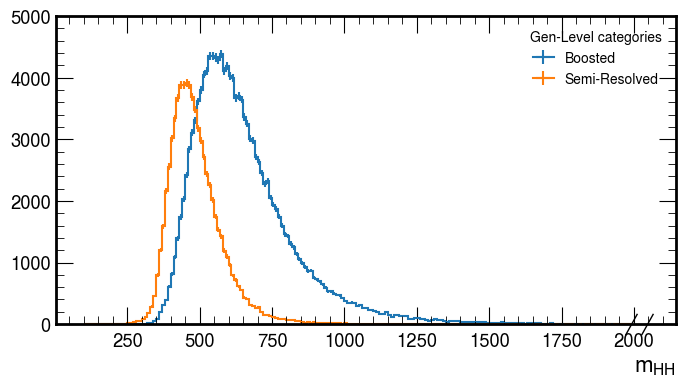

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
hep.histplot(hist_mhh[{"cat": "boosted"}], ax=ax, label="Boosted")
hep.histplot(hist_mhh[{"cat": "semi_resolved"}], ax=ax, label="Semi-Resolved")
leg = ax.legend(fontsize=10)
leg.set_title("Gen-Level categories", prop={"size": 10})
ax.set_xlabel(r"$m_{HH}$")
ax.set_ylim(0, 5000)

(0.0, 2000.0)

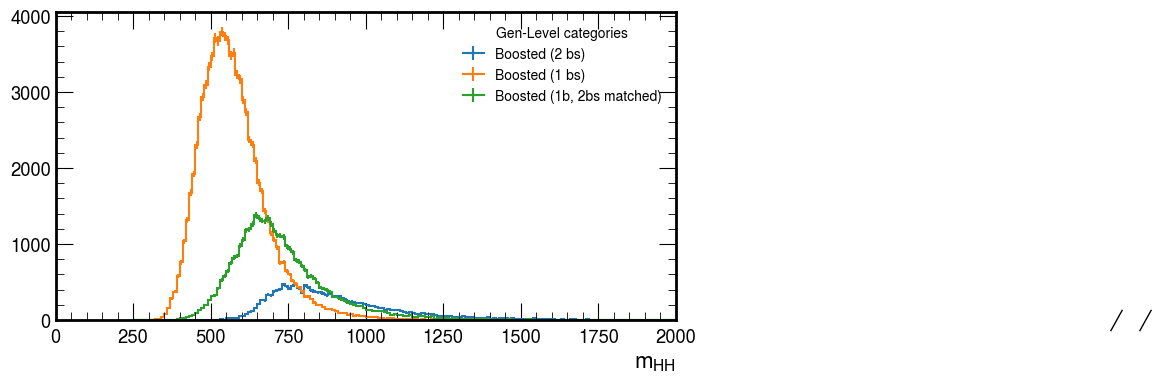

In [19]:
bins = np.arange(mhh.min(), mhh.max(), 10)
var_axis = hist.axis.Variable(bins, name="var", label="variable")
cat_axis = hist.axis.StrCategory([], name="cat", growth=True)

hist_mhh = hist.Hist(var_axis, cat_axis)
hist_mhh.fill(var=mhh[boosted_nb2], cat="boosted-2b")
hist_mhh.fill(var=mhh[boosted_nb1], cat="boosted-1b")
hist_mhh.fill(var=mhh[boosted_nb1nb2], cat="boosted-2b1b")

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
hep.histplot(hist_mhh[{"cat": "boosted-2b"}], ax=ax, label="Boosted (2 bs)")
hep.histplot(hist_mhh[{"cat": "boosted-1b"}], ax=ax, label="Boosted (1 bs)")
hep.histplot(hist_mhh[{"cat": "boosted-2b1b"}], ax=ax, label="Boosted (1b, 2bs matched)")
leg = ax.legend(fontsize=10)
leg.set_title("Gen-Level categories", prop={"size": 10})
ax.set_xlabel(r"$m_{HH}$")
ax.set_xlim(0, 2000)


(0.0, 5000.0)

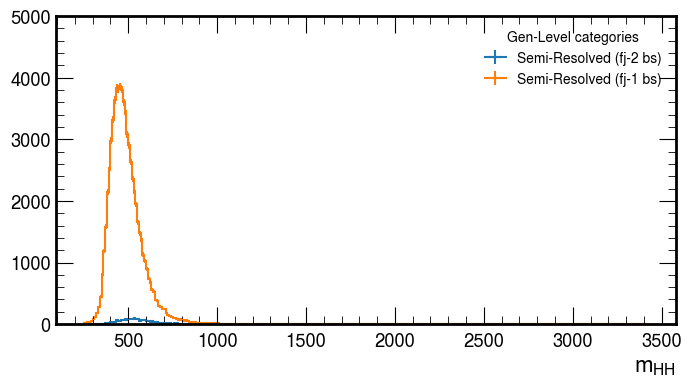

In [20]:
bins = np.arange(mhh.min(), mhh.max(), 10)
var_axis = hist.axis.Variable(bins, name="var", label="variable")
cat_axis = hist.axis.StrCategory([], name="cat", growth=True)

hist_mhh = hist.Hist(var_axis, cat_axis)
hist_mhh.fill(var=mhh[semi_resolved_h_b2], cat="semi-2b")
hist_mhh.fill(var=mhh[semi_resolved_h_b1], cat="semi-1b")

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
hep.histplot(hist_mhh[{"cat": "semi-2b"}], ax=ax, label="Semi-Resolved (fj-2 bs)")
hep.histplot(hist_mhh[{"cat": "semi-1b"}], ax=ax, label="Semi-Resolved (fj-1 bs)")
leg = ax.legend(fontsize=10)
leg.set_title("Gen-Level categories", prop={"size": 10})
ax.set_xlabel(r"$m_{HH}$")
ax.set_ylim(0, 5000)

In [21]:
hist_dr_h2 = hist.Hist(hist.axis.Regular(40, 0, 4, name="drb", label="max dr with b-quark"))
hist_dr_h2.fill(drbh2ak8[semi_resolved_h2_b2][indexak8[semi_resolved_h2_b2] == 1])
hist_dr_h2

Hist(Regular(40, 0, 4, name='drb', label='max dr with b-quark'), storage=Double()) # Sum: 16.0

In [22]:
hist_dr_h1 = hist.Hist(hist.axis.Regular(40, 0, 4, name="drb", label="max dr with b-quark"))
hist_dr_h1.fill(drbh1ak8[semi_resolved_h1_b2][indexak8[semi_resolved_h1_b2] == 0])
hist_dr_h1

Hist(Regular(40, 0, 4, name='drb', label='max dr with b-quark'), storage=Double()) # Sum: 12.0

Text(1, 0, 'Max dR(fatjet, b-quark)')

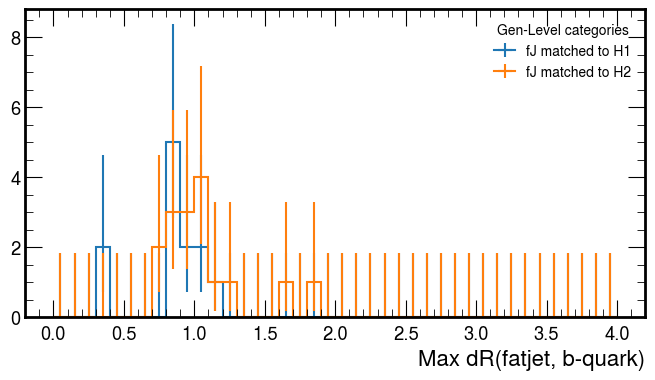

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
hep.histplot(hist_dr_h1, ax=ax, label="fJ matched to H1")
hep.histplot(hist_dr_h2, ax=ax, label="fJ matched to H2")
leg = ax.legend(fontsize=10)
leg.set_title("Gen-Level categories", prop={"size": 10})
ax.set_xlabel(r"Max dR(fatjet, b-quark)")

In [24]:
hist_dr_h2 = hist.Hist(hist.axis.Regular(40, 0, 4, name="drb", label="max dr with b-quark"))
hist_dr_h2.fill(drbh2ak8[semi_resolved_h2_b1][indexak8[semi_resolved_h2_b1] == 1])
hist_dr_h2

Hist(Regular(40, 0, 4, name='drb', label='max dr with b-quark'), storage=Double()) # Sum: 89.0

In [25]:
hist_dr_h1 = hist.Hist(hist.axis.Regular(40, 0, 4, name="drb", label="max dr with b-quark"))
hist_dr_h1.fill(drbh1ak8[semi_resolved_h1_b1][indexak8[semi_resolved_h1_b1] == 0])
hist_dr_h1

Hist(Regular(40, 0, 4, name='drb', label='max dr with b-quark'), storage=Double()) # Sum: 99.0

Text(1, 0, 'Max dR(fatjet, b-quark)')

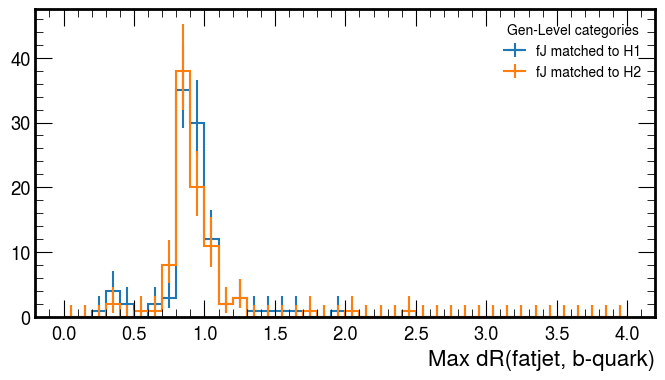

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
hep.histplot(hist_dr_h1, ax=ax, label="fJ matched to H1")
hep.histplot(hist_dr_h2, ax=ax, label="fJ matched to H2")
leg = ax.legend(fontsize=10)
leg.set_title("Gen-Level categories", prop={"size": 10})
ax.set_xlabel(r"Max dR(fatjet, b-quark)")

In [27]:
drbh2ak8[semi_resolved_h2_b2][indexak8[semi_resolved_h2_b2] == 1]

array([1.26690352, 1.07689881, 0.84601986, 0.940741  , 0.99736774,
       0.81884909, 0.79962927, 1.04078913, 0.93622339, 0.8668282 ,
       1.1162312 , 1.08592093, 1.02659726, 0.78301102, 1.66390789,
       1.81506729])

- further categorize `not-categorized events`:
  - what is the number of AK4 Jets matched to H1 and matched to H2 (1 + 2, 2 + 1, 0?. >2?)

In [28]:
# e.g. number of ak4 jets matched to h1 and h2 for non-categorized events
num_ak4m2h_nc = np.stack(
    [num_ak4m2h1[not_categorized], num_ak4m2h2[not_categorized]], axis=1
).tolist()

unique_pair_ak4m2h_nc = []
for pair in num_ak4m2h_nc:
    if (pair not in unique_pair_ak4m2h_nc) and (pair[::-1] not in unique_pair_ak4m2h_nc):
        unique_pair_ak4m2h_nc.append(pair)

print(unique_pair_ak4m2h_nc)

[[2, 1], [1, 1], [2, 2], [2, 3], [2, 0], [3, 1], [3, 0], [1, 0], [3, 3], [0, 0], [4, 1], [4, 2], [4, 0]]


  - what is the number of AK8 Jets matched to H1 and matched to H2 (1 + 2, 2 + 1, 0?. >2?)

In [29]:
num_ak8m2h_nc = np.stack(
    [num_ak8m2h1[not_categorized], num_ak8m2h2[not_categorized]], axis=1
).tolist()

unique_pair_ak8m2h_nc = []
for pair in num_ak8m2h_nc:
    if (pair not in unique_pair_ak8m2h_nc) and (pair[::-1] not in unique_pair_ak8m2h_nc):
        unique_pair_ak8m2h_nc.append(pair)

print(unique_pair_ak8m2h_nc)
# filter out weird events

[[0, 0], [1, 0], [2, 0], [2, 1]]


## Reco-level studies

- Understand FatJet tagger score + particle net mass distributions for events in each gen-level category

In [30]:
fj_mwh1_idx = events["ak8FatJetHiggsMatchIndex"].to_numpy() == 0
fj_mwh2_idx = events["ak8FatJetHiggsMatchIndex"].to_numpy() == 1

fj_xbb = events["ak8FatJetPNetXbb"].to_numpy()
fj_mass = events["ak8FatJetPNetMass"].to_numpy()

In [37]:
def plot_h1h2_fj(x, label, bins):
    fj_mwh1_semi_resolved = x[semi_resolved][fj_mwh1_idx[semi_resolved]]
    fj_mwh2_semi_resolved = x[semi_resolved][fj_mwh2_idx[semi_resolved]]

    fj_mwh1_boosted = x[boosted][fj_mwh1_idx[boosted]]
    fj_mwh2_boosted = x[boosted][fj_mwh2_idx[boosted]]

    fj_mwh1_resolved = x[resolved][fj_mwh1_idx[resolved]]
    fj_mwh2_resolved = x[resolved][fj_mwh2_idx[resolved]]

    fj_mwh1_outside = x[not_categorized][fj_mwh1_idx[not_categorized]]
    fj_mwh2_outside = x[not_categorized][fj_mwh2_idx[not_categorized]]

    var_axis = hist.axis.Variable(bins, name="var", label="variable")
    cat_axis = hist.axis.StrCategory([], name="cat", growth=True)

    h1 = hist.Hist(var_axis, cat_axis)
    h1.fill(var=fj_mwh1_boosted, cat="boosted")
    h1.fill(var=fj_mwh1_semi_resolved, cat="semi_resolved")
    #h1.fill(var=fj_mwh1_resolved, cat="resolved")
    h1.fill(var=fj_mwh1_outside, cat="non-categorized")

    h2 = hist.Hist(var_axis, cat_axis)
    h2.fill(var=fj_mwh2_boosted, cat="boosted")
    h2.fill(var=fj_mwh2_semi_resolved, cat="semi_resolved")
    #h2.fill(var=fj_mwh2_resolved, cat="resolved")
    h2.fill(var=fj_mwh2_outside, cat="non-categorized")

    print(fj_mwh1_resolved)
    fig, ax = plt.subplots(1, 2, figsize=(8, 4),sharey=True)
    hep.histplot(h1[{"cat": "boosted"}], ax=ax[0], label="Boosted", density=True)
    #hep.histplot(h1[{"cat": "resolved"}], ax=ax[0], label="Resolved", density=True)
    hep.histplot(h1[{"cat": "semi_resolved"}], ax=ax[0], label="Semi-Resolved", density=True)
    hep.histplot(h1[{"cat": "non-categorized"}], ax=ax[0], label="Outside of these categories", density=True)
    leg = ax[0].legend(fontsize=10)
    leg.set_title("Gen-Level categories", prop={"size": 10})
    ax[0].set_xlabel(label + " - matched to H1")

    hep.histplot(h2[{"cat": "boosted"}], ax=ax[1], label="Boosted", density=True)
    #hep.histplot(h2[{"cat": "resolved"}], ax=ax[1], label="Resolved", density=True)
    hep.histplot(h2[{"cat": "semi_resolved"}], ax=ax[1], label="Semi-Resolved", density=True)
    hep.histplot(h2[{"cat": "non-categorized"}], ax=ax[1], label="Outside of these categories", density=True)
    leg = ax[1].legend(fontsize=10)
    leg.set_title("Gen-Level categories", prop={"size": 10})
    ax[1].set_xlabel(label + " matched to H2")
    ax[0].set_ylabel("Density")

[]
[]


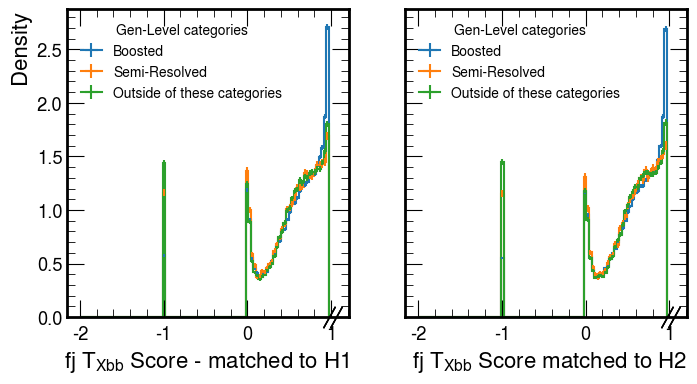

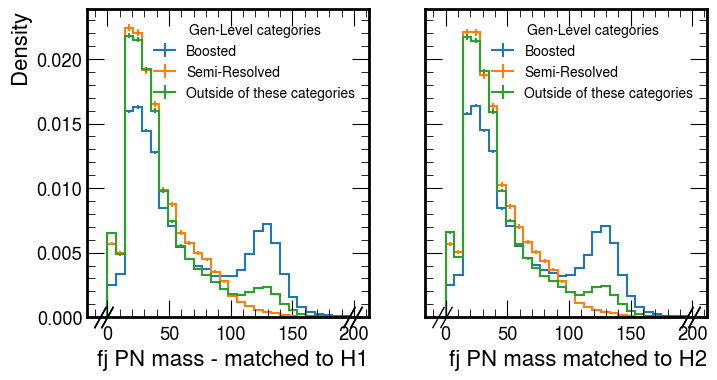

In [39]:
plot_h1h2_fj(fj_xbb, r"fj $T_{Xbb}$ Score", np.arange(-2, 1, 0.03))
plot_h1h2_fj(fj_mass, r"fj PN mass", np.arange(0, 200, 7))

In [42]:
def plot_h1h2_fj(x, label, bins):
    var_axis = hist.axis.Variable(bins, name="var", label="variable")
    cat_axis = hist.axis.StrCategory([], name="cat", growth=True)

    h1 = hist.Hist(var_axis, cat_axis)
    h1.fill(var=x[boosted_nb2][fj_mwh1_idx[boosted_nb2]], cat="boosted-2b")
    h1.fill(var=x[boosted_nb1][fj_mwh1_idx[boosted_nb1]], cat="boosted-1b")
    h1.fill(var=x[boosted_nb1nb2][fj_mwh1_idx[boosted_nb1nb2]], cat="boosted-2b1b")

    h2 = hist.Hist(var_axis, cat_axis)
    h2.fill(var=x[boosted_nb2][fj_mwh2_idx[boosted_nb2]], cat="boosted-2b")
    h2.fill(var=x[boosted_nb1][fj_mwh2_idx[boosted_nb1]], cat="boosted-1b")
    h2.fill(var=x[boosted_nb1nb2][fj_mwh2_idx[boosted_nb1nb2]], cat="boosted-2b1b")

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    hep.histplot(h1[{"cat": "boosted-2b"}], ax=ax[0], label="Boosted 2b", density=True)
    hep.histplot(h1[{"cat": "boosted-1b"}], ax=ax[0], label="Boosted 1b", density=True)
    hep.histplot(h1[{"cat": "boosted-2b1b"}], ax=ax[0], label="Boosted 2b1b", density=True)
    leg = ax[0].legend(fontsize=10)
    leg.set_title("Gen-Level categories", prop={"size": 10})
    ax[0].set_xlabel(label + " - matched to H1")

    hep.histplot(h2[{"cat": "boosted-2b"}], ax=ax[1], label="Boosted 2b", density=True)
    hep.histplot(h2[{"cat": "boosted-1b"}], ax=ax[1], label="Boosted 1b", density=True)
    hep.histplot(h2[{"cat": "boosted-2b1b"}], ax=ax[1], label="Boosted 2b1b", density=True)
    leg = ax[1].legend(fontsize=10)
    leg.set_title("Gen-Level categories", prop={"size": 10})
    ax[1].set_xlabel(label + " matched to H2")
    ax[0].set_ylabel("Density")

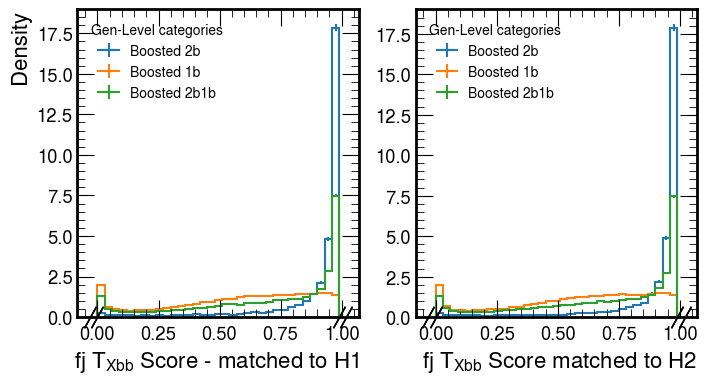

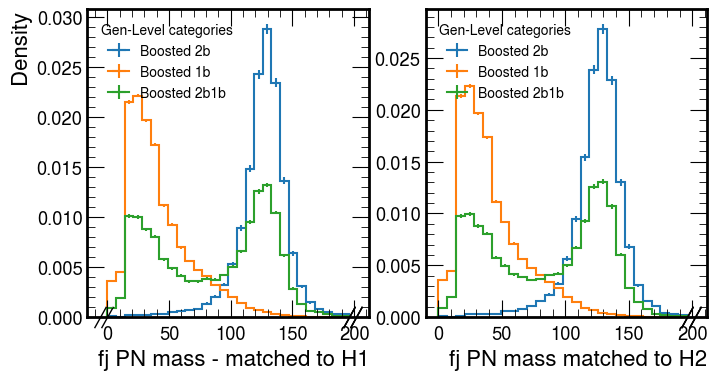

In [43]:
plot_h1h2_fj(fj_xbb, r"fj $T_{Xbb}$ Score", np.arange(0, 1, 0.03))
plot_h1h2_fj(fj_mass, r"fj PN mass", np.arange(0, 200, 7))

## Tasks for billy (reco-level)

Understand behavior at gen-level of `not-categorized events` (events that are not boosted, resolved or semi-resolved):
- 2d plot of fatjet reco pnet mass vs Xbb score for each category (Are they correlated?)

In [ ]:
# define a function to plot 2d histogram
plot_dir = "/uscms/home/haoyang/HH4b/plots/MatchingStudy"


def plot_hist2d(
    x_vals: np.ndarray,
    y_vals: np.ndarray,
    bins: [np.ndarray, np.ndarray],
    x_label: str,
    y_label: str,
    filename: str,
):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    for i in range(2):
        ax[i].hist2d(
            x_vals[:, i].reshape(-1),
            y_vals[:, i].reshape(-1),
            bins,
        )
        ax[i].set_xlabel(x_label)
        ax[i].set_ylabel(y_label)
        ax[i].set_title(f"Higgs {i + 1}")

    # hep.cms.label("Work in Progress", year="2022", com="13.6", ax=ax)
    # plt.savefig(f"{plot_dir}/{filename}.jpg", bbox_inches="tight")
    plt.show()

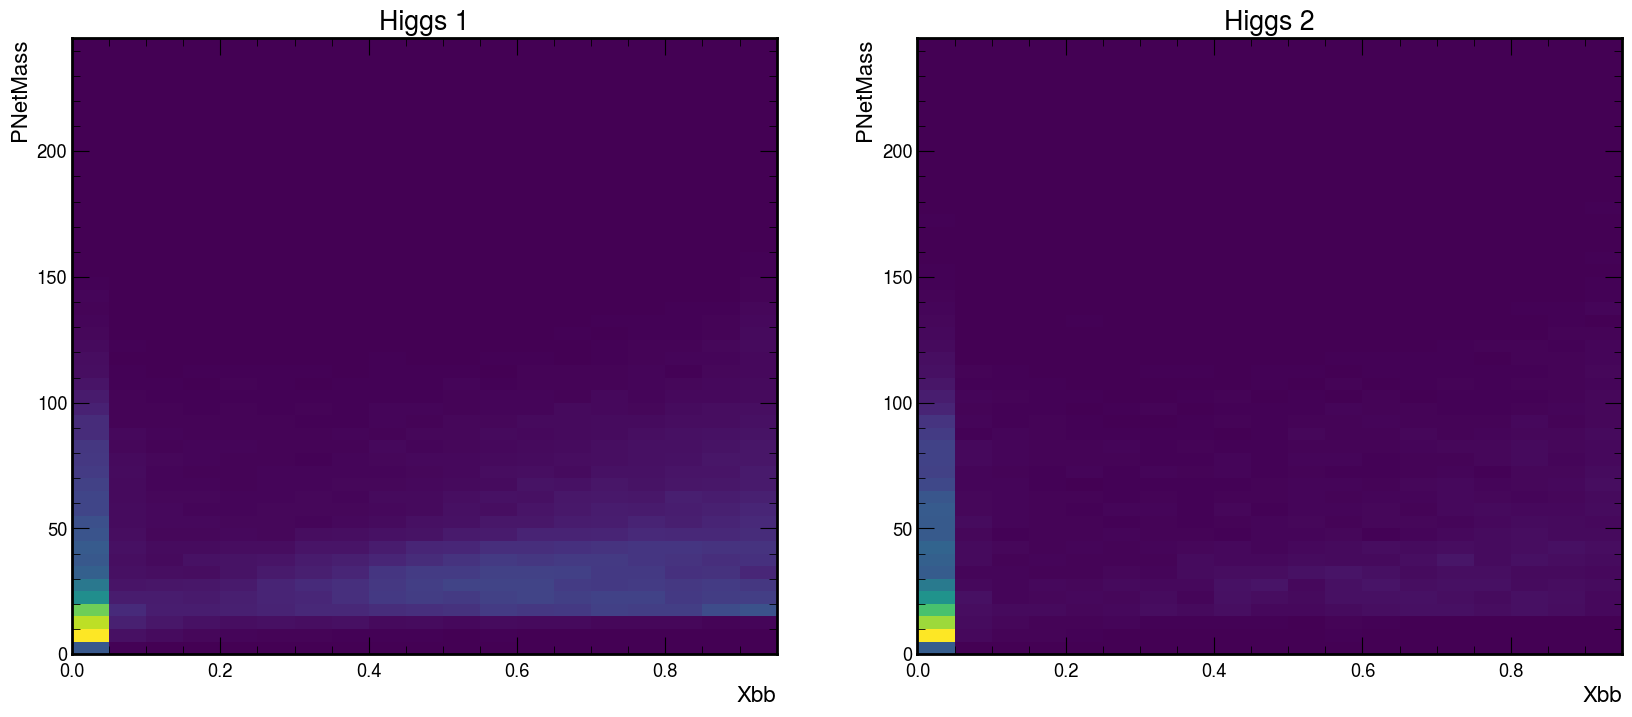

In [ ]:
# get PNetMass (y) ans Xbb (x)
fjXbb = events["ak8FatJetPNetXbb"].to_numpy()
fjXbb_ooc = fjXbb[not_categorized]
fjPNetMass = events["ak8FatJetPNetMass"].to_numpy()
fjPNetMass_ooc = fjPNetMass[not_categorized]

xbins = np.arange(0, fjXbb_ooc.max(), 0.05)
ybins = np.arange(0, fjPNetMass_ooc.max(), 5)
bins = [xbins, ybins]
plot_hist2d(fjXbb_ooc, fjPNetMass_ooc, bins, "Xbb", "PNetMass", "fj_reco_PNetMass_vs_Xbb_for_ooc")

### Billy's note: There are large negative numbers in Xbb and PNetMass.

- Plot AK8JetPNetMass and Xbb score for events that fail a tight boosted selection:
  - tight boosted selection: (fj_0_Xbb > 0.99) & (fj_0_pnet_mass > 100) & (fj_0_pnet_mass < 140>) & (fj_1_Xbb > 0.99) & (fj_1_pnet_mass > 100) & (fj_1_pnet_mass < 140>) where fj_0 and fj_1 are the fatjets in the event (sorted by Xbb, 0 has the highest Xbb score)

In [ ]:
# select on ooc event's fatjets
fj0Xbb_cond = fjXbb_ooc[:, 0] > 0.99
fj0PNetMass_cond = (fjPNetMass_ooc[:, 0] > 100) & (fjPNetMass_ooc[:, 0] < 140)
fj0_cond = fj0Xbb_cond & fj0PNetMass_cond

fj1Xbb_cond = fjXbb_ooc[:, 1] > 0.99
fj1PNetMass_cond = (fjPNetMass_ooc[:, 1] > 100) & (fjPNetMass_ooc[:, 1] < 140)
fj1_cond = fj1Xbb_cond & fj1PNetMass_cond

tight = fj0_cond & fj1_cond

fjPNetMass_fail = fjPNetMass_ooc[~tight].reshape(-1)
fjXbb_fail = fjXbb_ooc[~tight].reshape(-1)

Text(1, 0, 'failed ooc fjPNetMass')

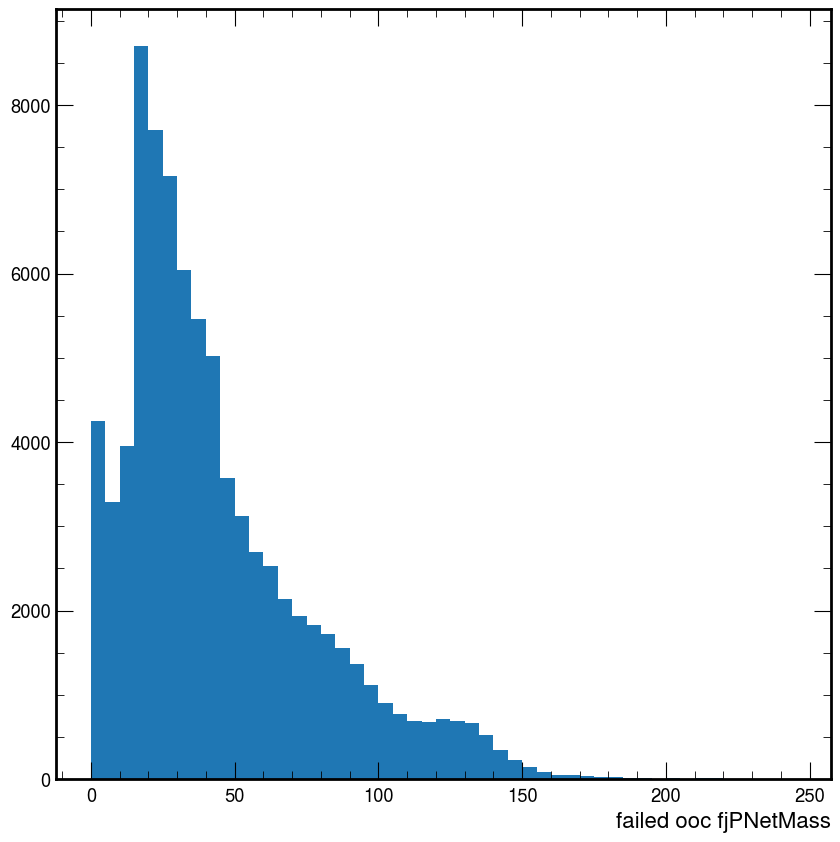

In [ ]:
plt.hist(fjPNetMass_fail, bins=ybins)
plt.xlabel("failed ooc fjPNetMass")

Text(1, 0, 'failed ooc fjXbb')

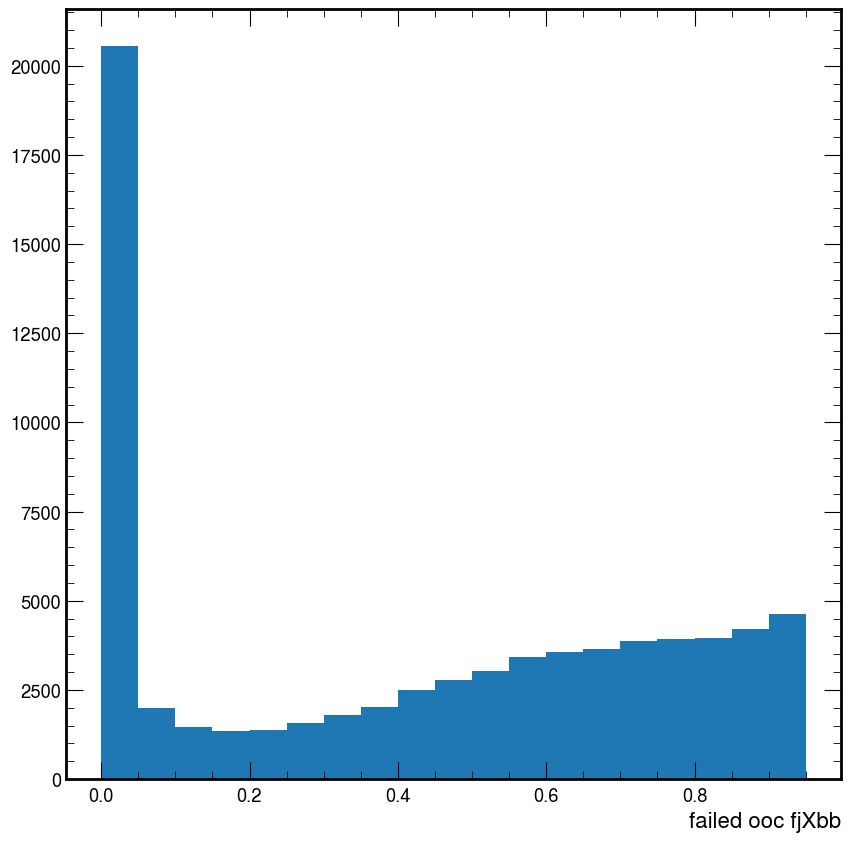

In [ ]:
plt.hist(fjXbb_fail, bins=xbins)
plt.xlabel("failed ooc fjXbb")